<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#필요한-라이브러리-설치-및-임포트" data-toc-modified-id="필요한-라이브러리-설치-및-임포트-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>필요한 라이브러리 설치 및 임포트</a></span></li><li><span><a href="#날짜데이터-형변환" data-toc-modified-id="날짜데이터-형변환-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>날짜데이터 형변환</a></span></li><li><span><a href="#같은-start_node_name에--다른-start_latitude" data-toc-modified-id="같은-start_node_name에--다른-start_latitude-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>같은 start_node_name에  다른 start_latitude</a></span></li><li><span><a href="#ㅇ0ㅇ" data-toc-modified-id="ㅇ0ㅇ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ㅇ0ㅇ</a></span></li><li><span><a href="#그래프-생성-함수" data-toc-modified-id="그래프-생성-함수-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>그래프 생성 함수</a></span><ul class="toc-item"><li><span><a href="#(예)-고성교차로" data-toc-modified-id="(예)-고성교차로-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>(예) 고성교차로</a></span></li><li><span><a href="#시계열그래프!" data-toc-modified-id="시계열그래프!-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>시계열그래프!</a></span></li><li><span><a href="#지도!" data-toc-modified-id="지도!-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>지도!</a></span></li><li><span><a href="#(예)-산신주유소" data-toc-modified-id="(예)-산신주유소-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>(예) 산신주유소</a></span></li><li><span><a href="#시계열그래프" data-toc-modified-id="시계열그래프-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>시계열그래프</a></span></li><li><span><a href="#지도" data-toc-modified-id="지도-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>지도</a></span></li><li><span><a href="#(예)-제3교래교-🌩" data-toc-modified-id="(예)-제3교래교-🌩-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>(예) 제3교래교 🌩</a></span></li></ul></li><li><span><a href="#분석-시작" data-toc-modified-id="분석-시작-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>분석 시작</a></span></li></ul></div>

# 제주도 도로 교통량 예측 AI 경진대회

In [1]:
import pandas as pd
import numpy as np

In [6]:
train_df = pd.read_csv('./open/train.csv')
train_df # 470만행.. ㄷㄷ!

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [7]:
test_df = pd.read_csv('./open/test.csv') 

In [8]:
train_df.dtypes

id                        object
base_date                  int64
day_of_week               object
base_hour                  int64
lane_count                 int64
road_rating                int64
road_name                 object
multi_linked               int64
connect_code               int64
maximum_speed_limit      float64
vehicle_restricted       float64
weight_restricted        float64
height_restricted        float64
road_type                  int64
start_node_name           object
start_latitude           float64
start_longitude          float64
start_turn_restricted     object
end_node_name             object
end_latitude             float64
end_longitude            float64
end_turn_restricted       object
target                   float64
dtype: object

## 날짜데이터 형변환

In [9]:
# train
train_df['base_date'] = train_df['base_date'].astype(object)
train_df['base_hour'] = train_df['base_hour'].astype(object)

yyyy = train_df['base_date'].astype(str).str[0:4]
mm = train_df['base_date'].astype(str).str[4:6]
dd = train_df['base_date'].astype(str).str[6:8]
tt = train_df['base_hour'].astype(str) # 추가

train_df['base_date_obj'] = yyyy+'-'+mm+'-'+dd
train_df['base_hour_obj'] = yyyy+'-'+mm+'-'+dd + ' ' +tt+':00:00'

train_df['base_date_edited'] = pd.to_datetime(train_df['base_date_obj'])
train_df['base_hour_edited'] = pd.to_datetime(train_df['base_hour_obj'])
train_df.head(3)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,base_date_obj,base_hour_obj,base_date_edited,base_hour_edited
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,없음,제3교래교,33.427749,126.662335,없음,52.0,2022-06-23,2022-06-23 17:00:00,2022-06-23,2022-06-23 17:00:00
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022-07-28,2022-07-28 21:00:00,2022-07-28,2022-07-28 21:00:00
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,없음,상창육교,33.280072,126.362147,없음,61.0,2021-10-10,2021-10-10 7:00:00,2021-10-10,2021-10-10 07:00:00


In [10]:
# test
test_df['base_date'] = test_df['base_date'].astype(object)
test_df['base_hour'] = test_df['base_hour'].astype(object)

yyyy = test_df['base_date'].astype(str).str[0:4]
mm = test_df['base_date'].astype(str).str[4:6]
dd = test_df['base_date'].astype(str).str[6:8]
tt = test_df['base_hour'].astype(str) # 추가

test_df['base_date_obj'] = yyyy+'-'+mm+'-'+dd
test_df['base_hour_obj'] = yyyy+'-'+mm+'-'+dd + ' ' +tt+':00:00'

test_df['base_date_edited'] = pd.to_datetime(test_df['base_date_obj'])
test_df['base_hour_edited'] = pd.to_datetime(test_df['base_hour_obj'])
test_df.head(3)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,base_date_obj,base_hour_obj,base_date_edited,base_hour_edited
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,126.541298,없음,제주은행사거리,33.500772,126.543837,있음,2022-08-25,2022-08-25 17:00:00,2022-08-25,2022-08-25 17:00:00
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,126.427003,없음,관광단지입구,33.258119,126.415840,없음,2022-08-09,2022-08-09 12:00:00,2022-08-09,2022-08-09 12:00:00
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,126.476508,없음,도순2교,33.259206,126.474687,없음,2022-08-05,2022-08-05 2:00:00,2022-08-05,2022-08-05 02:00:00


## 같은 start_node_name에  다른 start_latitude

시작지점명이 고성교차로인 행이 42169개 인데 시작지점의 위도는 23291개이다. 오잉?

In [11]:
train_df['start_node_name'].value_counts()

고성교차로              42169
산신주유소              29386
미수2교               26635
영주교                24381
봉개교 시종점            24290
                   ...  
외산리사무소               934
와산리                  881
성미가든                 788
서귀포시 호근동 1838-4      744
CU서귀호근로점             744
Name: start_node_name, Length: 487, dtype: int64

In [12]:
train_df['start_latitude'].value_counts()

33.248633    23291
33.435941    20775
33.465863    18137
33.507349    18084
33.500330    18076
             ...  
33.491729      881
33.437249      788
33.256671      744
33.261270      744
33.257401      587
Name: start_latitude, Length: 586, dtype: int64

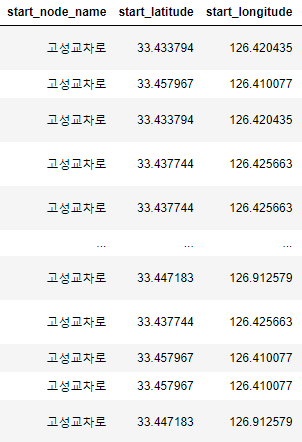

In [13]:
quary = train_df[train_df['start_node_name']=='고성교차로']
quary

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,base_date_obj,base_hour_obj,base_date_edited,base_hour_edited
62,TRAIN_0000062,20220125,화,10,2,103,일반국도95호선,0,0,80.0,...,없음,제3고성교,33.436550,126.423971,없음,73.0,2022-01-25,2022-01-25 10:00:00,2022-01-25,2022-01-25 10:00:00
169,TRAIN_0000169,20220309,수,16,2,106,중산간서로,0,0,70.0,...,없음,예원교차로,33.455702,126.401325,없음,53.0,2022-03-09,2022-03-09 16:00:00,2022-03-09,2022-03-09 16:00:00
375,TRAIN_0000375,20220216,수,1,2,103,일반국도95호선,0,0,80.0,...,없음,제3고성교,33.436550,126.423971,없음,74.0,2022-02-16,2022-02-16 1:00:00,2022-02-16,2022-02-16 01:00:00
388,TRAIN_0000388,20211020,수,1,2,103,일반국도95호선,0,0,80.0,...,없음,제2고성교,33.438795,126.427168,없음,80.0,2021-10-20,2021-10-20 1:00:00,2021-10-20,2021-10-20 01:00:00
572,TRAIN_0000572,20211204,토,5,2,103,일반국도95호선,0,0,80.0,...,없음,제3고성교,33.436690,126.424159,없음,76.0,2021-12-04,2021-12-04 5:00:00,2021-12-04,2021-12-04 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700782,TRAIN_4700782,20220504,수,15,2,103,일반국도12호선,0,0,50.0,...,없음,홈마트,33.450294,126.912167,없음,31.0,2022-05-04,2022-05-04 15:00:00,2022-05-04,2022-05-04 15:00:00
4700789,TRAIN_4700789,20211012,화,18,2,103,일반국도95호선,0,0,80.0,...,없음,제2고성교,33.438795,126.427168,없음,65.0,2021-10-12,2021-10-12 18:00:00,2021-10-12,2021-10-12 18:00:00
4701112,TRAIN_4701112,20220303,목,16,2,106,중산간서로,0,0,70.0,...,없음,예원교차로,33.455702,126.401325,없음,47.0,2022-03-03,2022-03-03 16:00:00,2022-03-03,2022-03-03 16:00:00
4701192,TRAIN_4701192,20220109,일,11,2,106,중산간서로,0,0,70.0,...,없음,광령3교차로,33.462228,126.423639,없음,65.0,2022-01-09,2022-01-09 11:00:00,2022-01-09,2022-01-09 11:00:00


In [14]:
quary['start_latitude'].value_counts()

33.447183    15525
33.437744    10742
33.457967    10530
33.433794     5372
Name: start_latitude, dtype: int64

In [15]:
quary['start_longitude'].value_counts()

126.912579    15525
126.425663    10742
126.410077    10530
126.420435     5372
Name: start_longitude, dtype: int64

고성교차로이면서 경도가 126.912, 위도가 33.447인 곳

In [16]:
quary2 = train_df[(train_df.start_node_name =='고성교차로') & (train_df.start_latitude>=33.447183) & (train_df.start_latitude<=126.912579)]
quary2.head(3)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,base_date_obj,base_hour_obj,base_date_edited,base_hour_edited
169,TRAIN_0000169,20220309,수,16,2,106,중산간서로,0,0,70.0,...,없음,예원교차로,33.455702,126.401325,없음,53.0,2022-03-09,2022-03-09 16:00:00,2022-03-09,2022-03-09 16:00:00
1018,TRAIN_0001018,20220118,화,15,2,106,중산간서로,0,0,70.0,...,없음,광령3교차로,33.462228,126.423639,없음,58.0,2022-01-18,2022-01-18 15:00:00,2022-01-18,2022-01-18 15:00:00
1322,TRAIN_0001322,20220613,월,3,2,106,중산간서로,0,0,70.0,...,없음,광령3교차로,33.462228,126.423639,없음,54.0,2022-06-13,2022-06-13 3:00:00,2022-06-13,2022-06-13 03:00:00


base_date도 다양하고 한 날짜에도 여러 target 값들이 있음

In [17]:
quary2['base_date'].value_counts()

20220215    48
20220118    48
20220217    48
20220122    48
20220123    48
            ..
20220516     6
20220616     6
20220518     4
20220519     4
20220701     2
Name: base_date, Length: 251, dtype: int64

In [18]:
quary2['end_node_name'].value_counts()

광령3교차로    5271
예원교차로     5259
Name: end_node_name, dtype: int64

## ㅇ0ㅇ

고성교차로 외에도 이름은 같으나 위치좌표가 다른 곳이 존재한다

In [19]:
name_lst = []
uni_lst = []

name_lst = train_df['start_node_name'].unique()

In [20]:
for i in name_lst:
    tmp_df = train_df[train_df['start_node_name'] == i]
    temp = tmp_df['start_latitude'].nunique()
    uni_lst.append(temp)
    print(temp)

2
1
1
1
1
1
1
2
1
1
1
1
1
2
2
1
1
1
2
1
1
1
1
1
2
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
2
1
3
1
2
1
1
1
1
4
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
2
2
1
1
2
1
2
1
1
1
2
1
2
1
1
1
2
2
1
1
3
1
2
1
1
1
2
1
1
1
1
1
2
1
1
1
2
2
1
1
1
1
2
1
2
1
1
1
2
1
1
1
1
2
2
1
1
1
2
1
1
1
1
2
2
1
1
2
1
1
2
2
1
2
1
1
1
1
1
2
1
1
1
2
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
2
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
2
1
1
2
2
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
2
1
1
2
1
1
1
2
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
2
2
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
2
2
1
1
2
1
1
1
2
1
1
1
2
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [21]:
df = pd.DataFrame(None)
df['name'] = name_lst
df['cnt_str_lat'] = uni_lst
df

,name,cnt_str_lat
0,제3교래교,2
1,광양사거리,1
2,창고천교,1
3,남양리조트,1
4,애월샷시,1
...,...,...
482,산양입구,1
483,성산포식당,1
484,애상로271,1
485,상위미,1


In [22]:
df['cnt_str_lat'].value_counts()

1    393
2     90
3      3
4      1
Name: cnt_str_lat, dtype: int64

## 그래프 생성 함수

위치는 다른, 동일한 이름을 가진 노드가 많다 <br/>
그 지점에서의 target 수를 확인할 수 있는 시계열그래프를 def를 통해 정의하고 생성해보쟈 

In [23]:
def node(nodename):   
    quary = train_df[train_df.start_node_name==nodename]
    print('----start_latitude----')
    print(quary.start_latitude.value_counts())
    print('')
    print('----start_longitude----')
    print(quary.start_longitude.value_counts())

In [24]:
def endnode(nodename,lat1,lat2):
    quary = train_df[(train_df.start_node_name ==nodename) & (train_df.start_latitude>=lat1) & (train_df.start_latitude<=lat2)]
    print('----end_node_name----')
    print(quary.end_node_name.value_counts())
    print('')
    print('----end_latitude----')
    print(quary.end_latitude.value_counts())
    print('')
    print('----end_longitude----')
    print(quary.end_longitude.value_counts())

In [25]:
def eda_graph(nodename,endnode,lat1,lat2):
    quary2 = train_df[(train_df.start_node_name ==nodename) & (train_df.start_latitude>=lat1) & (train_df.start_latitude<=lat2)]
    quary2 = quary2[(quary2.end_node_name ==endnode)]
    quary2 = quary2[['base_date_edited','start_node_name','start_latitude','start_longitude','target']]
    quary2.set_index('base_date_edited',drop=True,inplace=True)
    return quary2['target'].plot(figsize=(18,5),alpha=0.8) # xlim=['2021-09-01','2021-11-15']

In [26]:
def eda_graph_real(nodename,endnode,lat1,lat2):
    quary2 = train_df[(train_df.start_node_name ==nodename) & (train_df.start_latitude>=lat1) & (train_df.start_latitude<=lat2)]
    quary2 = quary2[(quary2.end_node_name ==endnode)]
    quary2 = quary2[['base_date_edited','start_node_name','start_latitude','start_longitude','target']]
    quary2['base_date_edited2'] = quary2['base_date_edited']
    quary2 = quary2[['base_date_edited','base_date_edited2','start_node_name','start_latitude','start_longitude','target']]
    quary2.set_index('base_date_edited',drop=True,inplace=True)
    quary3 = quary2.groupby('base_date_edited2').agg({'target':'mean'})
    return quary3['target'].plot(figsize=(18,5),alpha=0.8)

In [27]:
# 시간대도 추가

In [28]:
def eda_graph_real2(nodename,endnode,lat1,lat2,date1,date2):
    quary2 = train_df[(train_df.start_node_name ==nodename) & (train_df.start_latitude>=lat1) & (train_df.start_latitude<=lat2)]
    quary2 = quary2[(quary2.end_node_name ==endnode)]
    quary2 = quary2[['base_hour_edited','start_node_name','start_latitude','start_longitude','target']]
    quary2['base_hour_edited2'] = quary2['base_hour_edited']
    quary2 = quary2[['base_hour_edited','base_hour_edited2','start_node_name','start_latitude','start_longitude','target']]
    quary2.set_index('base_hour_edited',drop=True,inplace=True)
    quary3 = quary2.groupby('base_hour_edited2').agg({'target':'mean'})
    return quary3['target'].plot(figsize=(18,5),xlim=[date1,date2],alpha=0.8)

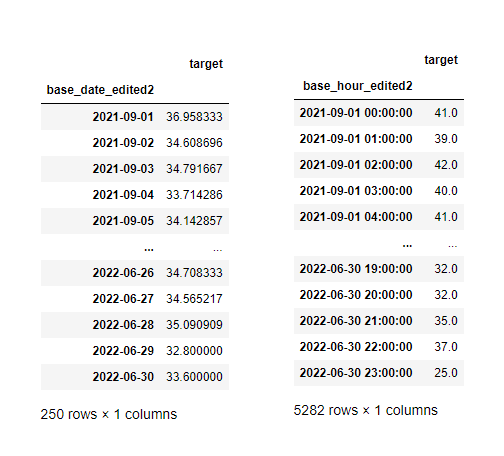

### (예) 고성교차로

In [29]:
node('고성교차로')

----start_latitude----
33.447183    15525
33.437744    10742
33.457967    10530
33.433794     5372
Name: start_latitude, dtype: int64

----start_longitude----
126.912579    15525
126.425663    10742
126.410077    10530
126.420435     5372
Name: start_longitude, dtype: int64


In [30]:
endnode('고성교차로',33.447,33.448) # 33.447183 값을 넣으면 테이블이 제대로 안나오기에 범위로 하여금 추출함
                                    # 33.4471827098691 임

----end_node_name----
영진기계     5282
성산교차로    5184
홈마트      5059
Name: end_node_name, dtype: int64

----end_latitude----
33.445847    5282
33.444121    5184
33.450294    5059
Name: end_latitude, dtype: int64

----end_longitude----
126.903808    5282
126.912948    5184
126.912167    5059
Name: end_longitude, dtype: int64


<AxesSubplot:xlabel='base_date_edited'>

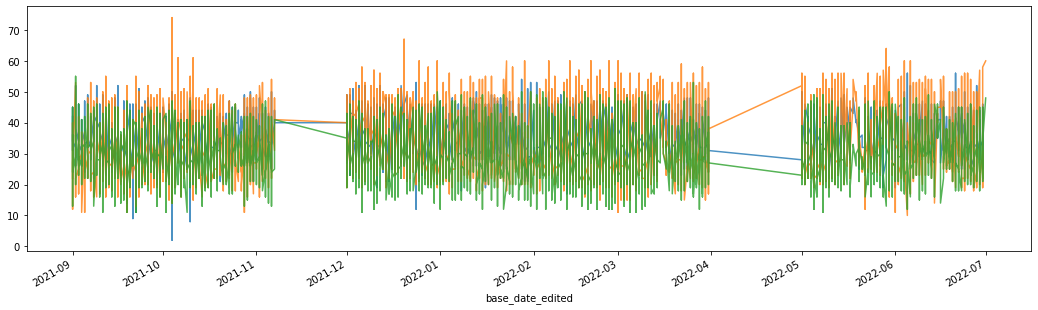

In [31]:
eda_graph('고성교차로','영진기계',33.447,33.448)
eda_graph('고성교차로','성산교차로',33.447,33.448)
eda_graph('고성교차로','홈마트',33.447,33.448)

### 시계열그래프!

그래프로 **2021년 11월 ~ 2021년 12월** 부분과 **2022년 4월 ~ 2022년 5월** 부분에서의 데이터가 누락되어 있는 것을 확인할 수 있다

그리고 날짜 하나에 여러값들이 있기에 평균으로 다시 계산해 보정해준다

<AxesSubplot:xlabel='base_date_edited2'>

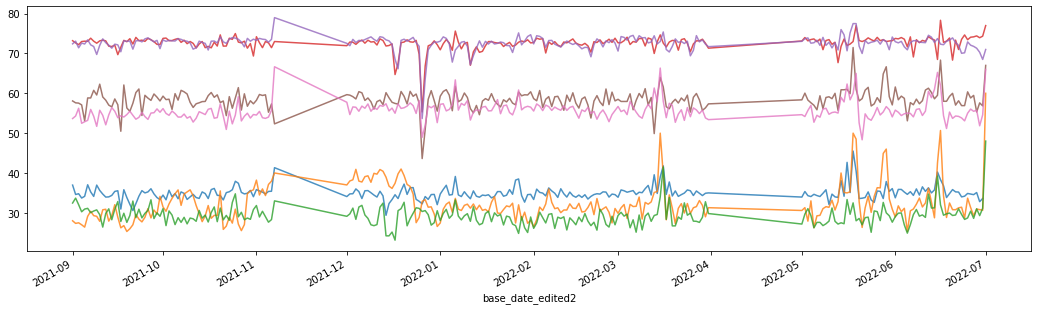

In [32]:
eda_graph_real('고성교차로','영진기계',33.447,33.448) # 파
eda_graph_real('고성교차로','성산교차로',33.447,33.448) # 초
eda_graph_real('고성교차로','홈마트',33.447,33.448) # 주

eda_graph_real('고성교차로','제2고성교',33.437,33.438) # 빨
eda_graph_real('고성교차로','제3고성교',33.437,33.438) # 보

eda_graph_real('고성교차로','광령3교차로',33.457,33.458) # 갈
eda_graph_real('고성교차로','예원교차로',33.457,33.458) # 분

출발지는 같지만 도착지는 다름. 하지만 비슷한 추세의 형태의 그래프를 확인할 수 있다 <br/>
아래 지도 사진은 고성교차로 네 곳

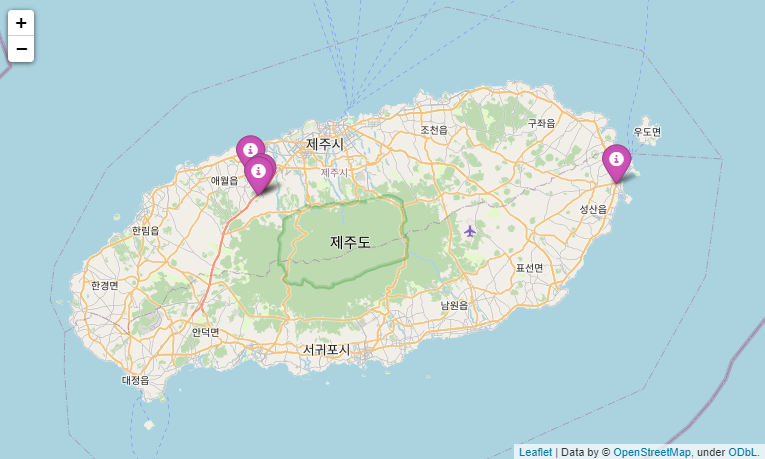

### 지도!

https://velog.io/@eodud0582/Folium

In [33]:
import folium

m = folium.Map(location=[33.447183,126.912579],zoom_start=14)

# start
folium.Marker([33.447183, 126.912579],
              popup='<b>start_node</b>',
              tooltip='<i>S_고성교차로</i>',
              icon=folium.Icon(
              color='red')).add_to(m)

# end
folium.Marker([33.445847, 126.903808],
              popup='<b>end_node</b>',
              tooltip='<i>E_영진기계</i>',
              icon=folium.Icon(
              color='blue')).add_to(m)

folium.Marker([33.444121, 126.912948],
              popup='<b>end_node</b>',
              tooltip='<i>E_성산교차로</i>',
              icon=folium.Icon(
              color='blue')).add_to(m)

folium.Marker([33.450294, 126.912167],
              popup='<b>end_node</b>',
              tooltip='<i>E_홈마트</i>',
              icon=folium.Icon(
              color='blue')).add_to(m)

m

### (예) 산신주유소

In [34]:
node('산신주유소')

----start_latitude----
33.255215    17605
33.255431    11781
Name: start_latitude, dtype: int64

----start_longitude----
126.414236    17605
126.413687    11781
Name: start_longitude, dtype: int64


In [35]:
endnode('산신주유소',33.2552,33.2553)

----end_node_name----
산신주유소     5899
중문한의원     5870
관광단지입구    5836
Name: end_node_name, dtype: int64

----end_latitude----
33.255431    5899
33.251884    5870
33.258119    5836
Name: end_latitude, dtype: int64

----end_longitude----
126.413687    5899
126.423200    5870
126.415840    5836
Name: end_longitude, dtype: int64


### 시계열그래프

<AxesSubplot:xlabel='base_date_edited2'>

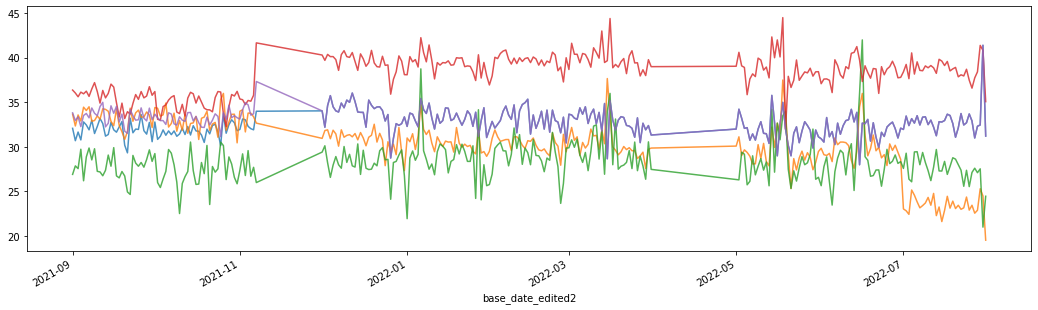

In [36]:
eda_graph_real('산신주유소','산신주유소',33.2552,33.2553) # 파
eda_graph_real('산신주유소','중문한의원',33.2552,33.2553) # 초
eda_graph_real('산신주유소','관광단지입구',33.2552,33.2553) # 주
##
eda_graph_real('산신주유소','산신주유소',33.2554,33.2555) # 빨
eda_graph_real('산신주유소','예래입구',33.2554,33.2555) # 보

### 지도

In [37]:
import folium

m3 = folium.Map(location=[33.255215,126.414236],zoom_start=14)

# start
folium.Marker([33.255215,126.414236],
              popup='<b>start_node</b>',
              tooltip='<i>S_산신주유소</i>',
              icon=folium.Icon(
              color='red')).add_to(m3)

# end
folium.Marker([33.255431, 126.413687],
              popup='<b>end_node</b>',
              tooltip='<i>E_산신주유소</i>',
              icon=folium.Icon(
              color='blue')).add_to(m3)

folium.Marker([33.251884, 126.423200],
              popup='<b>end_node</b>',
              tooltip='<i>E_중문한의원</i>',
              icon=folium.Icon(
              color='blue')).add_to(m3)

folium.Marker([33.258119, 126.415840],
              popup='<b>end_node</b>',
              tooltip='<i>E_관광단지입구</i>',
              icon=folium.Icon(
              color='blue')).add_to(m3)

m3

### (예) 제3교래교 🌩

교래교래교래교

In [38]:
node('제3교래교')

----start_latitude----
33.427747    8923
33.427749    4154
Name: start_latitude, dtype: int64

----start_longitude----
126.662612    8923
126.662335    4154
Name: start_longitude, dtype: int64


읭.. 출발:제3교래교 - 도착:제3교래교?

In [39]:
endnode('제3교래교',33.427747,33.427748)

----end_node_name----
제3교래교    4776
교래사거리    4147
Name: end_node_name, dtype: int64

----end_latitude----
33.427749    4776
33.433558    4147
Name: end_latitude, dtype: int64

----end_longitude----
126.662335    4776
126.672298    4147
Name: end_longitude, dtype: int64


확인해보니 위경도 좌표가 달랐다

In [40]:
quary2 = train_df[(train_df.start_node_name =='제3교래교') & (train_df.start_latitude>=33.427747) & (train_df.start_latitude<=33.427748)]
quary2 = quary2[(quary2.end_node_name =='제3교래교')]
quary2 = quary2[['base_date_edited','start_node_name','start_latitude','start_longitude','end_node_name','end_latitude','end_longitude','target']]
quary2.tail(3)

,base_date_edited,start_node_name,start_latitude,start_longitude,end_node_name,end_latitude,end_longitude,target
4697158,2021-12-10,제3교래교,33.427747,126.662612,제3교래교,33.427749,126.662335,59.0
4697159,2022-01-19,제3교래교,33.427747,126.662612,제3교래교,33.427749,126.662335,51.0
4700577,2021-12-03,제3교래교,33.427747,126.662612,제3교래교,33.427749,126.662335,53.0


<AxesSubplot:xlabel='base_date_edited2'>

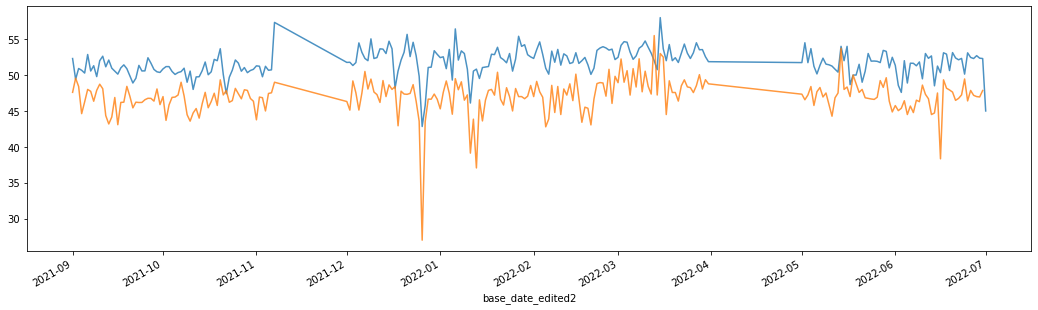

In [41]:
eda_graph_real('제3교래교','제3교래교',33.427747,33.427748)
eda_graph_real('제3교래교','교래사거리',33.427747,33.427748)

In [42]:
import folium

m2 = folium.Map(location=[33.427747,126.662612],zoom_start=14)

# start
folium.Marker([33.427747, 126.662612],
              popup='<b>start_node</b>',
              tooltip='<i>제3교래교</i>',
              icon=folium.Icon(
              color='red')).add_to(m2)

# end
folium.Marker([33.427749, 126.662335],
              popup='<b>end_node</b>',
              tooltip='<i>제3교래교</i>',
              icon=folium.Icon(
              color='blue')).add_to(m2)

folium.Marker([33.433558, 126.672298],
              popup='<b>end_node</b>',
              tooltip='<i>교래사거리</i>',
              icon=folium.Icon(
              color='blue')).add_to(m2)

m2